In [130]:
import random as rnd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Credit for this Guided Project: Ken Jee: https://www.youtube.com/@KenJee_ds

In [131]:
gdf = pd.read_csv(r'/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/Sports Matches Predictive Modeling:Simulation/nba_games_stats_2014to2018.csv')

In [132]:
print(gdf.columns, '\n')

gdf.sample(8)

Index(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'],
      dtype='object') 



,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
4029,1251,NYK,12,2015-11-17,Home,CHO,W,102,94,36,...,17,25,0.680,8,42,13,7,7,7,16
245,822,BRK,82,2015-04-15,Home,ORL,W,101,88,39,...,5,13,0.385,10,42,18,6,4,17,21
2739,3433,CHO,34,2016-01-04,Away,GSW,L,101,111,38,...,6,6,1.000,3,37,32,4,9,11,19
7780,7394,CHI,73,2018-03-24,Away,DET,L,95,117,39,...,15,18,0.833,12,49,33,6,7,13,11
3319,4040,HOU,40,2016-01-13,Home,MIN,W,107,104,37,...,24,30,0.800,14,43,25,11,1,20,27
649,767,DEN,76,2015-04-03,Away,SAS,L,93,123,40,...,15,17,0.882,14,45,33,11,8,18,15
4685,1259,TOR,12,2015-11-17,Away,GSW,L,110,115,37,...,18,27,0.667,9,34,31,10,6,20,29
8215,16100,HOU,16,2017-11-16,Away,PHO,W,142,116,43,...,12,21,0.571,16,47,28,9,5,14,22


In [133]:
# I like the Boston Celtics (I think, lol), so I'll go with them!

bodf = gdf[gdf['Team'] == 'BOS']
cldf = gdf[gdf['Team'] == 'CLE']

In [134]:
# Using a Lambda Function to Filter out all Games NOT from the 2017-2018 Season

bodf['Date'] = bodf['Date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d', errors = 'ignore'))
bodf = bodf[bodf['Date'] > pd.to_datetime('20171001', format = '%Y%m%d', errors = 'ignore')]

cldf['Date'] = cldf['Date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d', errors = 'ignore'))
cldf = cldf[cldf['Date'] > pd.to_datetime('20171001', format = '%Y%m%d', errors = 'ignore')]

/var/folders/j3/3j69h7bd37v9q0182sm6scrh0000gn/T/ipykernel_62343/46849952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bodf['Date'] = bodf['Date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d', errors = 'ignore'))
/var/folders/j3/3j69h7bd37v9q0182sm6scrh0000gn/T/ipykernel_62343/46849952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf['Date'] = cldf['Date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d', errors = 'ignore'))


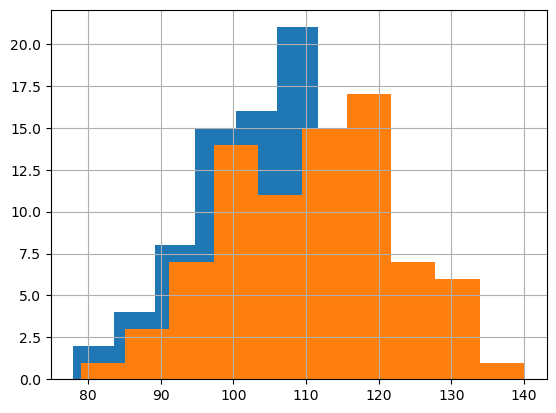

In [135]:
# Histograms Depicting each Team's respective Points' Distributions

bodf['TeamPoints'].hist()
cldf['TeamPoints'].hist()
plt.show()

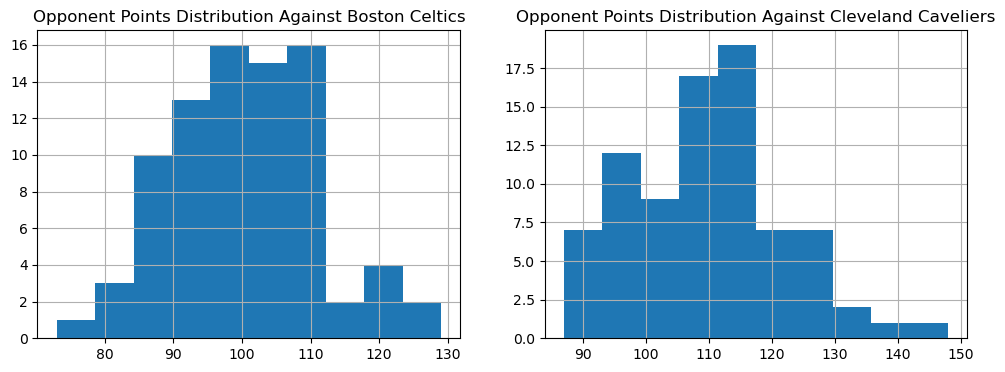

In [136]:
# Histograms Depicting Distribution of Points Conceded by Each Team to respective Opponents

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
bodf['OpponentPoints'].hist()
plt.title('Opponent Points Distribution Against Boston Celtics')

plt.subplot(1, 2, 2)
cldf['OpponentPoints'].hist()
plt.title('Opponent Points Distribution Against Cleveland Caveliers')

plt.show()

In [137]:
# Getting Important Statistical Measures

# Self Metrics
bo_mean_pts = bodf.TeamPoints.mean().round(2)
cl_mean_pts = cldf.TeamPoints.mean().round(2)

bo_sd_pts = bodf.TeamPoints.std()
cl_sd_pts = cldf.TeamPoints.std()

# Opposition Metrics
bo_mean_opppts = bodf.OpponentPoints.mean().round(2)
cl_mean_opppts = cldf.OpponentPoints.mean().round(2)

bo_sd_opppts = bodf.OpponentPoints.std()
cl_sd_opppts = cldf.OpponentPoints.std()

# Printing them out to View
print("Boston Celtics Points Mean: ", bo_mean_pts)
print("Boston Celtics Points SD: ", bo_sd_pts)
print("Cleveland Points Mean: ", cl_mean_pts)
print("Cleveland Points SD: ", cl_sd_pts)

print("Boston Celtics Opposition Points Mean: ", bo_mean_opppts)
print("Boston Celtics Opposition Points SD: ", bo_sd_opppts)
print("Cleveland Opposition Points Mean: ", cl_mean_opppts)
print("Cleveland Opposition Points SD: ", cl_sd_opppts)

Boston Celtics Points Mean:  104.01
Boston Celtics Points SD:  10.400016503357067
Cleveland Points Mean:  110.85
Cleveland Points SD:  12.02068377014038
Boston Celtics Opposition Points Mean:  100.43
Boston Celtics Opposition Points SD:  10.67017359920435
Cleveland Opposition Points Mean:  109.93
Cleveland Opposition Points SD:  12.052130069205973


In [156]:
# Randomly Sample again from a Specific Distribution

# Gaussian (Normal) Distribution
rnd.gauss(bo_mean_pts, bo_sd_pts) # after Running this enough times, it should reach a Limit of an Average of 104 (the Actual Mean of Boston Celtics Points^)

# Looping Through to get a Value close/at the Actual

low, high = 101, 107
result = None

while result is None or not (low <= result <= high):
    result = generate_gaussian()

print(f"Successfully generated value within range {low}-{high}: {result:.2f}")

Successfully generated value within range 101-107: 105.44


In [158]:
# Function that Simulates 1 Match

def gameSim():
    BOScore = (rnd.gauss(bo_mean_pts, bo_sd_pts) + rnd.gauss(cl_mean_opppts, cl_sd_opppts))/2 # Simulates Boston Celtics Score by taking a Sample from Random Distribution of Boston Celtics Offense VS Cleveland's Defense
    CLScore = (rnd.gauss(cl_mean_pts, cl_sd_pts) + rnd.gauss(bo_mean_opppts, bo_sd_opppts))/2
    if int(round(BOScore)) > int(round(CLScore)):
        return 1
    elif int(round(BOScore)) < int(round(CLScore)):
        return -1
    else: return 0

In [160]:
gameSim()

1

In [166]:
# Runs the "gameSim" Function again & again and Tabulates the Results of the Simulations^

def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win += 1 
        elif gm == -1:
            team2win += 1
        else: tie += 1 
    print('BOS Win ', team1win/(team1win + team2win + tie), '%')
    print('CLE Win ', team2win/(team1win + team2win + tie), '%')
    print('Tie ', tie/(team1win + team2win + tie), '%')
    return gamesout

In [168]:
gamesSim(10) # Ran the gameSim() Simulation 10 times; 10 Matches Simulated

# After 10 Matches Between them, each of Boston Celtics and Cleveland Caveliers can be Expected to Win Half (50% W-L Ratio)!

BOS Win  0.5 %
CLE Win  0.5 %
Tie  0.0 %


[-1, -1, -1, 1, 1, 1, 1, 1, -1, -1]